In [1]:

import lightning
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from torch_geometric.data import DataLoader



In [2]:
num_classes = 5
bounding_parameter = 10
a = torch.randint(0, num_classes, (30, ))
b = torch.functional.F.one_hot(a, num_classes=num_classes)

In [3]:
current = torch.clamp(b.sum(dim=0), min=0, max=bounding_parameter)
current

tensor([9, 4, 4, 6, 7])

In [7]:
Y = torch.arange(bounding_parameter).float()
sums = b.sum(dim=0).float()
a = 10
sums



tensor([9., 4., 4., 6., 7.])

In [ ]:
F.sigmoid(a*(sums[:, None] - Y - 0.5) )

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 9.9993e-01, 3.7754e-01],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9993e-01, 3.7754e-01, 2.7536e-05,
         1.2502e-09, 5.6757e-14, 2.5768e-18, 1.1698e-22],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9993e-01, 3.7754e-01, 2.7536e-05,
         1.2502e-09, 5.6757e-14, 2.5768e-18, 1.1698e-22],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9993e-01,
         3.7754e-01, 2.7536e-05, 1.2502e-09, 5.6757e-14],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         9.9993e-01, 3.7754e-01, 2.7536e-05, 1.2502e-09]])

In [5]:
F.sigmoid(a*(F.elu(sums[:, None] - Y) - 0.5))

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 9.9945e-01, 9.2414e-01, 7.5858e-02],
        [1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01, 7.5858e-02, 3.4683e-03,
         1.0869e-03, 7.0892e-04, 6.0576e-04, 5.7171e-04],
        [1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01, 7.5858e-02, 3.4683e-03,
         1.0869e-03, 7.0892e-04, 6.0576e-04, 5.7171e-04],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01,
         7.5858e-02, 3.4683e-03, 1.0869e-03, 7.0892e-04],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01,
         9.2414e-01, 7.5858e-02, 3.4683e-03, 1.0869e-03]])

In [77]:
F.sigmoid(a*(F.elu(sums[:, None] - Y ) - 0.5))

tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         9.9945e-01, 9.2414e-01, 7.5858e-02, 3.4683e-03],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01, 7.5858e-02,
         3.4683e-03, 1.0869e-03, 7.0892e-04, 6.0576e-04],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01,
         7.5858e-02, 3.4683e-03, 1.0869e-03, 7.0892e-04],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01,
         7.5858e-02, 3.4683e-03, 1.0869e-03, 7.0892e-04],
        [1.0000e+00, 1.0000e+00, 1.0000e+00, 9.9945e-01, 9.2414e-01, 7.5858e-02,
         3.4683e-03, 1.0869e-03, 7.0892e-04, 6.0576e-04]])

In [32]:
F.sigmoid(F.silu(( - torch.arange(bounding_parameter)[:, None]).float()))

tensor([[0.9991, 1.0000, 1.0000, 0.9999, 1.0000],
        [0.9975, 1.0000, 0.9999, 0.9997, 1.0000],
        [0.9931, 1.0000, 0.9997, 0.9991, 0.9999],
        [0.9807, 1.0000, 0.9991, 0.9975, 0.9997],
        [0.9457, 0.9999, 0.9975, 0.9931, 0.9991],
        [0.8534, 0.9997, 0.9931, 0.9807, 0.9975],
        [0.6750, 0.9991, 0.9807, 0.9457, 0.9931],
        [0.5000, 0.9975, 0.9457, 0.8534, 0.9807],
        [0.4332, 0.9931, 0.8534, 0.6750, 0.9457],
        [0.4407, 0.9807, 0.6750, 0.5000, 0.8534]])

tensor([1., 2., 4., 8.])


<Axes: >

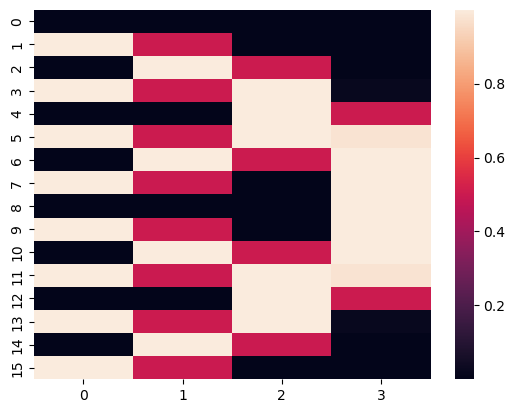

In [118]:
# sinusoidal encoding
import math
def sinusoidal_encode(x, bounding_parameter=4):
    div_term = torch.exp2(torch.arange(0, bounding_parameter, 1).float())
    print(div_term)

    return -torch.cos(x[:, None] / div_term * math.pi)

import seaborn as sns
sns.heatmap(torch.sigmoid(10*sinusoidal_encode(torch.arange(16).float())).detach().numpy())

In [104]:
print(math.cos((2*4) / (2) *math.pi))

1.0
